### Hierachical Clustering
- EX: Living things can form hierarchy (animals->mamels->humans)
- Clusters are contained in one another

### Eurovision scoring dataset Hierical Clustering
- Every country begins in its separate cluster
- At each step the two cloest two clusters are merged
- Continue until all countries are in a single cluster
- This is called allogomarative clustering

### Wheat Dataset

In [15]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('data\\seeds_dataset.txt',sep='\s+',header=None)
df.columns = [
    "area", "perimeter", "compactness", "length",
    "width_kernel", "asymmetry_coeff", "groove", "class"
]
df['varieties'] = df['class'].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'})

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\abhip\AppData\Local\Temp\ipykernel_23560\2573887594.py:5: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv('data\\seeds_dataset.txt',sep='\s+',header=None)


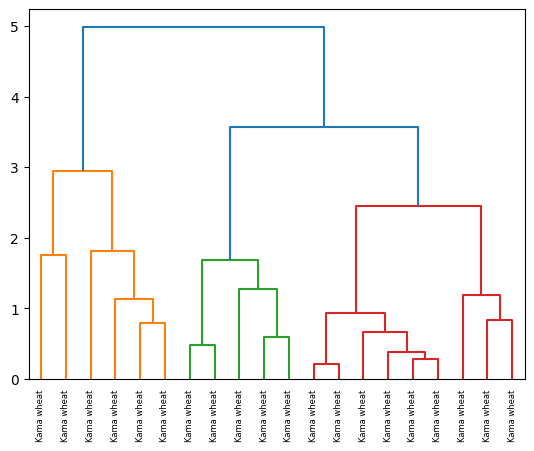

In [16]:

samples=df[df.columns[:-1]].head(20).values
varieties=df['varieties'].head(20).values
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings ,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

### We can extract clusters from intermediate stages of hierahcal clustering
- We choose a height and get the clusters at that height
- Height=distance between merging cluster

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings ,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,t=6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)



NameError: name 'country_names' is not defined

### t-SNE for 2-D mappings
- Maps samples to 2D (or 3D space)
- Map approx preserves nearness of samples
- Great for inspecting datasets

#### t-SNE on Iris dataset
- Iris dataset has 4 measurements so is 4D
- t-SNE maps to 2D
- Only has fit_transform method
- No individual fit and transform
- Can't extend map to add new samples. Need to start over
- Need to experiment with different learning rates


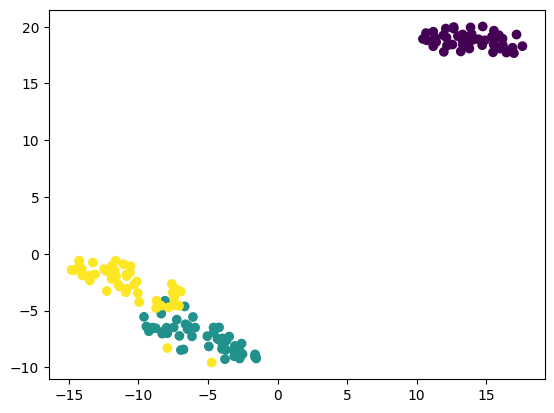

In [20]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
iris=load_iris()

model= TSNE(learning_rate=100)

transformed=model.fit_transform(iris.data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=iris.target)
plt.show()